In [ ]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

#!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 10.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 13.3 MB/s eta 0:00:01
     -------------------------- ------------- 2.0/3.0 MB 13.9 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 10.3 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 12.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 10.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 k


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [3]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [4]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-11-04 00:00:00+00:00,14133.707031,35116364962,402.141998,15126077675,1.001079,51351488942,26.931515,383972480
2020-11-05 00:00:00+00:00,15579.848633,40856321439,414.067352,15440711038,1.000420,50361326125,27.675859,299236756
2020-11-06 00:00:00+00:00,15565.880859,39837841971,454.719299,16738305610,1.000296,52898738178,29.018000,343104562
2020-11-07 00:00:00+00:00,14833.753906,35024953706,435.713135,18873289788,1.001576,56226369647,27.738094,362934993
2020-11-08 00:00:00+00:00,15479.567383,26632075029,453.554779,11292383601,1.000846,36518314883,28.305117,321186882


In [5]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-10-31 00:00:00+00:00,109556.164062,60090359560,3847.080322,37800100395,0.999577,135248715842,1088.955444,4399392720
2025-11-01 00:00:00+00:00,110064.015625,25871668762,3874.187988,17490279524,0.999664,74530426678,1094.642334,2138185589
2025-11-02 00:00:00+00:00,110639.625000,34284209459,3911.063232,20479611654,1.000066,87990855403,1084.359863,2049912244
2025-11-03 00:00:00+00:00,106547.523438,72852006359,3602.308105,53091469560,0.999853,176871325526,992.535400,4849653054
2025-11-04 00:00:00+00:00,104626.187500,86804201472,3557.446289,55936163840,0.999928,194737651712,961.238342,4916355584


In [6]:
data.shape

(1827, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-11-04 00:00:00+00:00 to 2025-11-04 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [8]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [9]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,52167.017082,3.651531e+10,2455.652756,1.920243e+10,1.000167,6.962811e+10,429.970610,1.781293e+09
std,29285.873016,2.232729e+10,968.456720,1.273588e+10,0.000714,4.424264e+10,218.876406,1.486316e+09
min,14133.707031,5.331173e+09,402.141998,2.081626e+09,0.995872,9.989859e+09,26.931515,2.038465e+08
25%,28129.829102,2.142552e+10,1703.266052,1.025234e+10,0.999917,3.977983e+10,275.968018,7.869686e+08
50%,43746.445312,3.161340e+10,2349.791260,1.615086e+10,1.000154,5.927333e+10,375.319092,1.544347e+09
75%,66419.734375,4.590953e+10,3212.085938,2.402646e+10,1.000410,8.616316e+10,588.708954,2.142045e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


#Exploratory Data Analysis

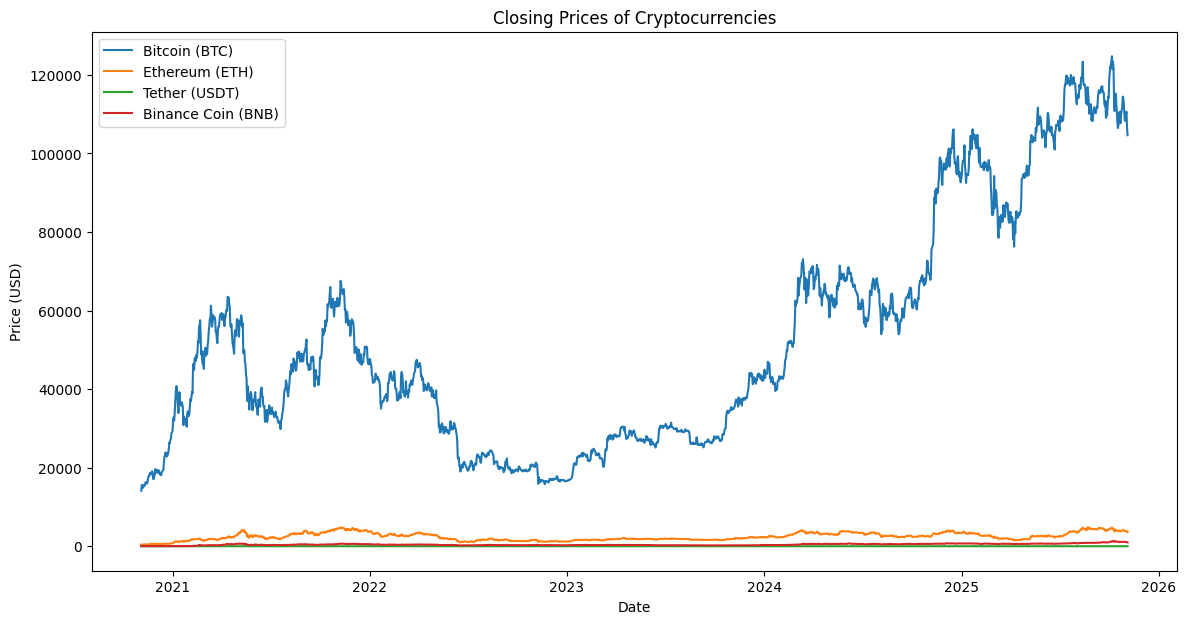

In [10]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

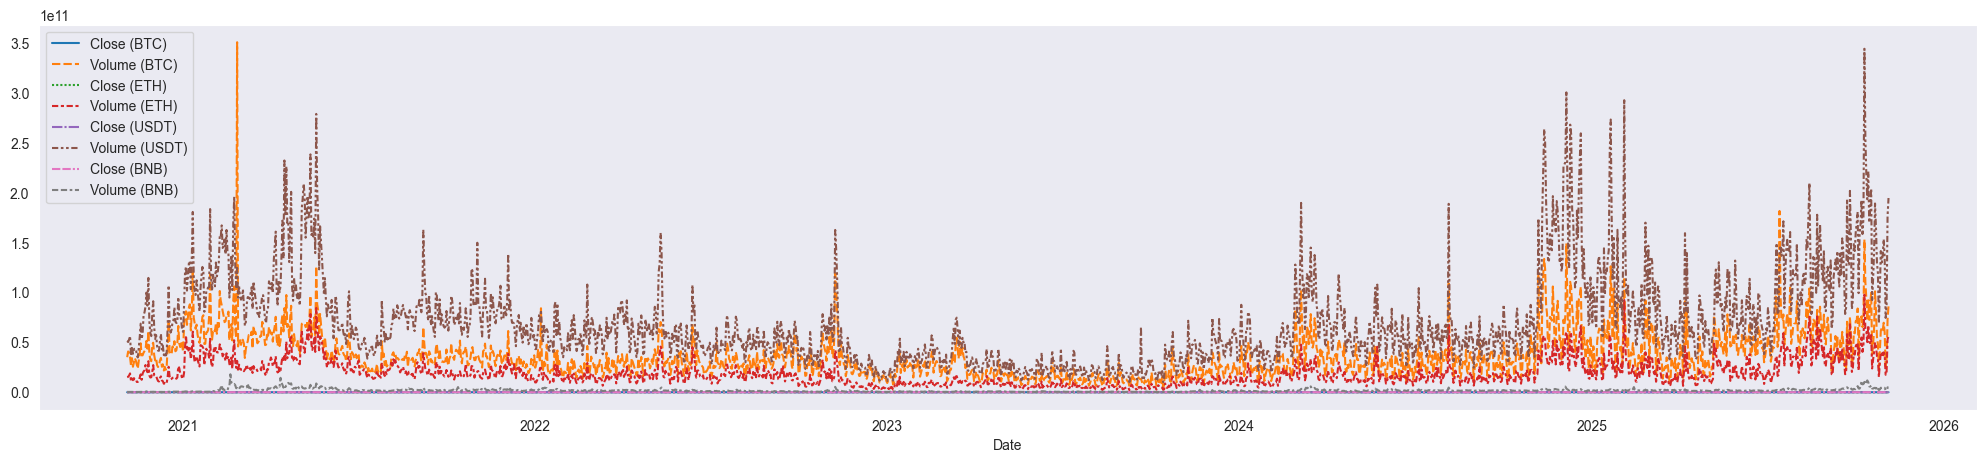

In [11]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

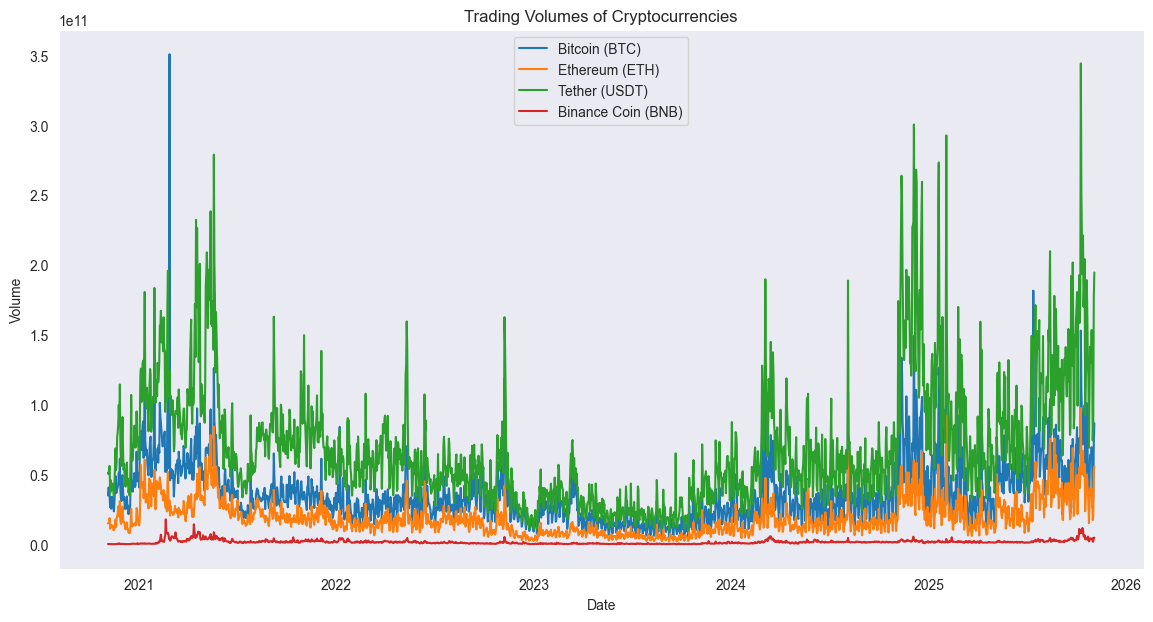

In [12]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


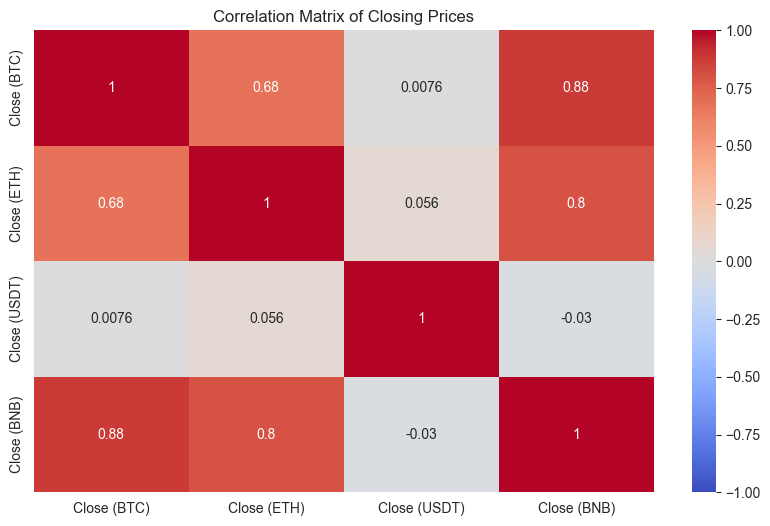

In [13]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


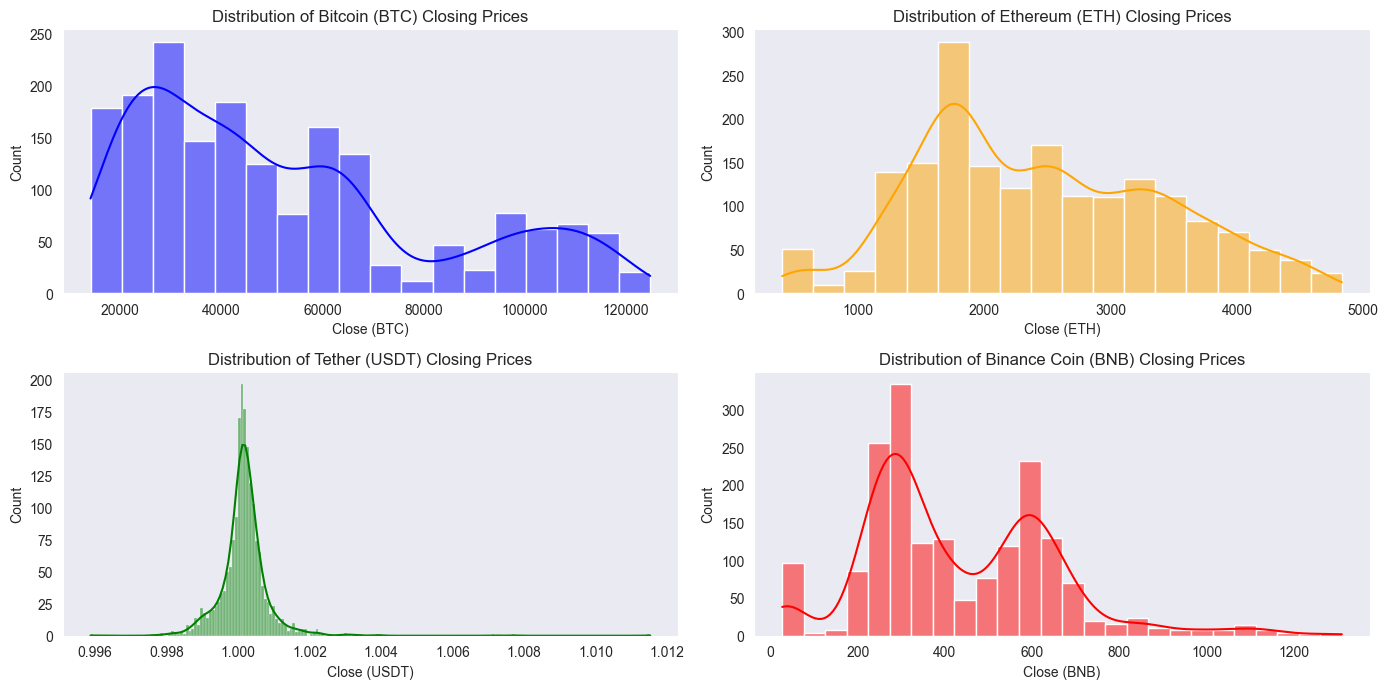

In [14]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

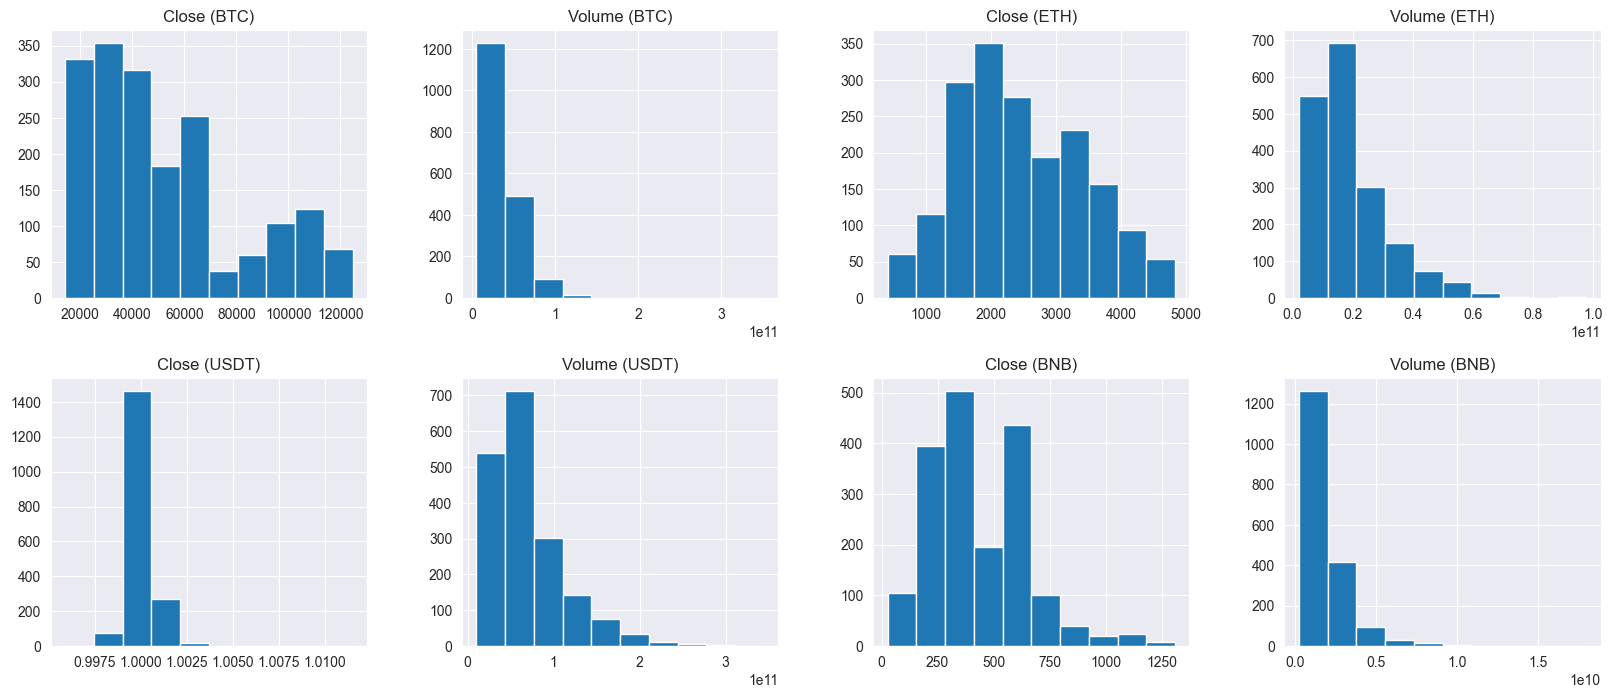

In [15]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

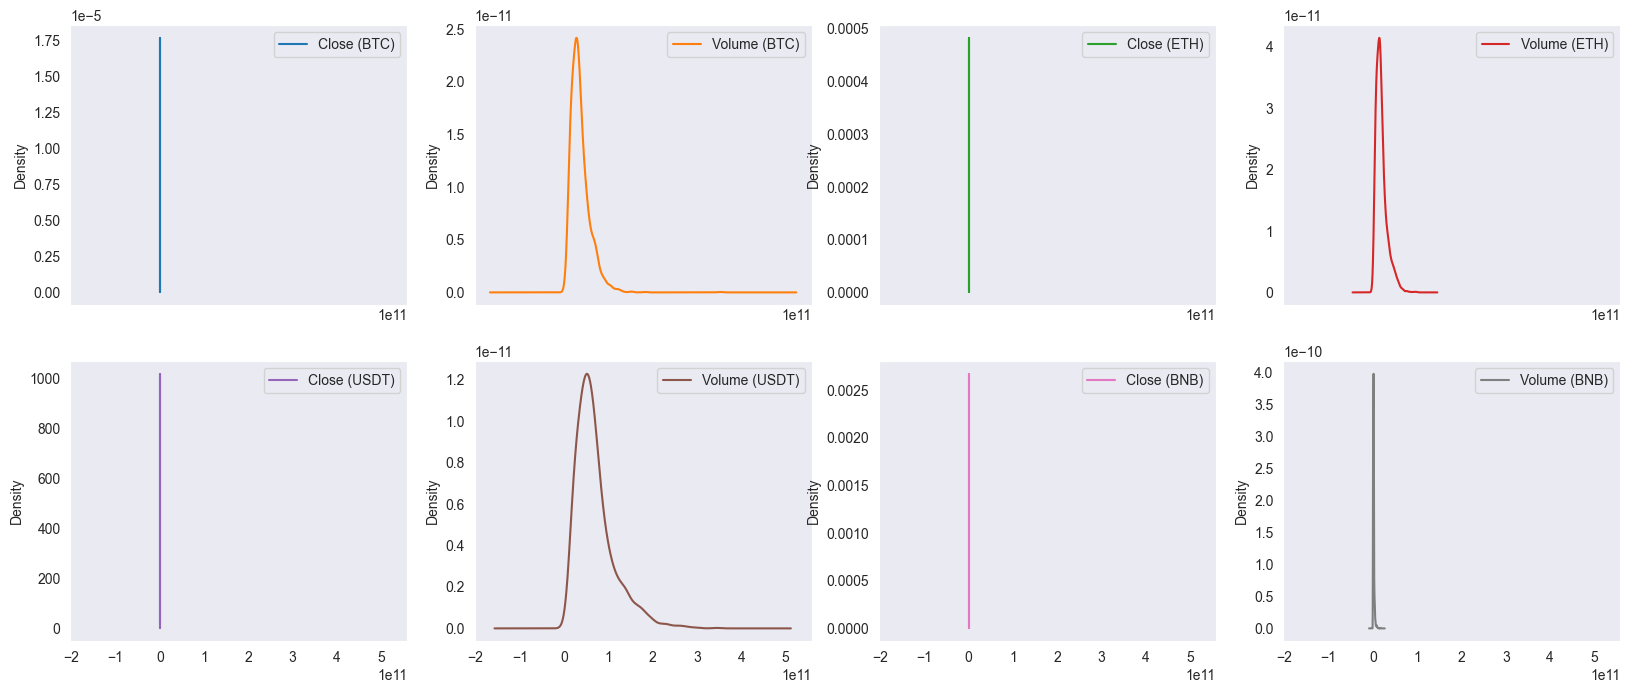

In [16]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

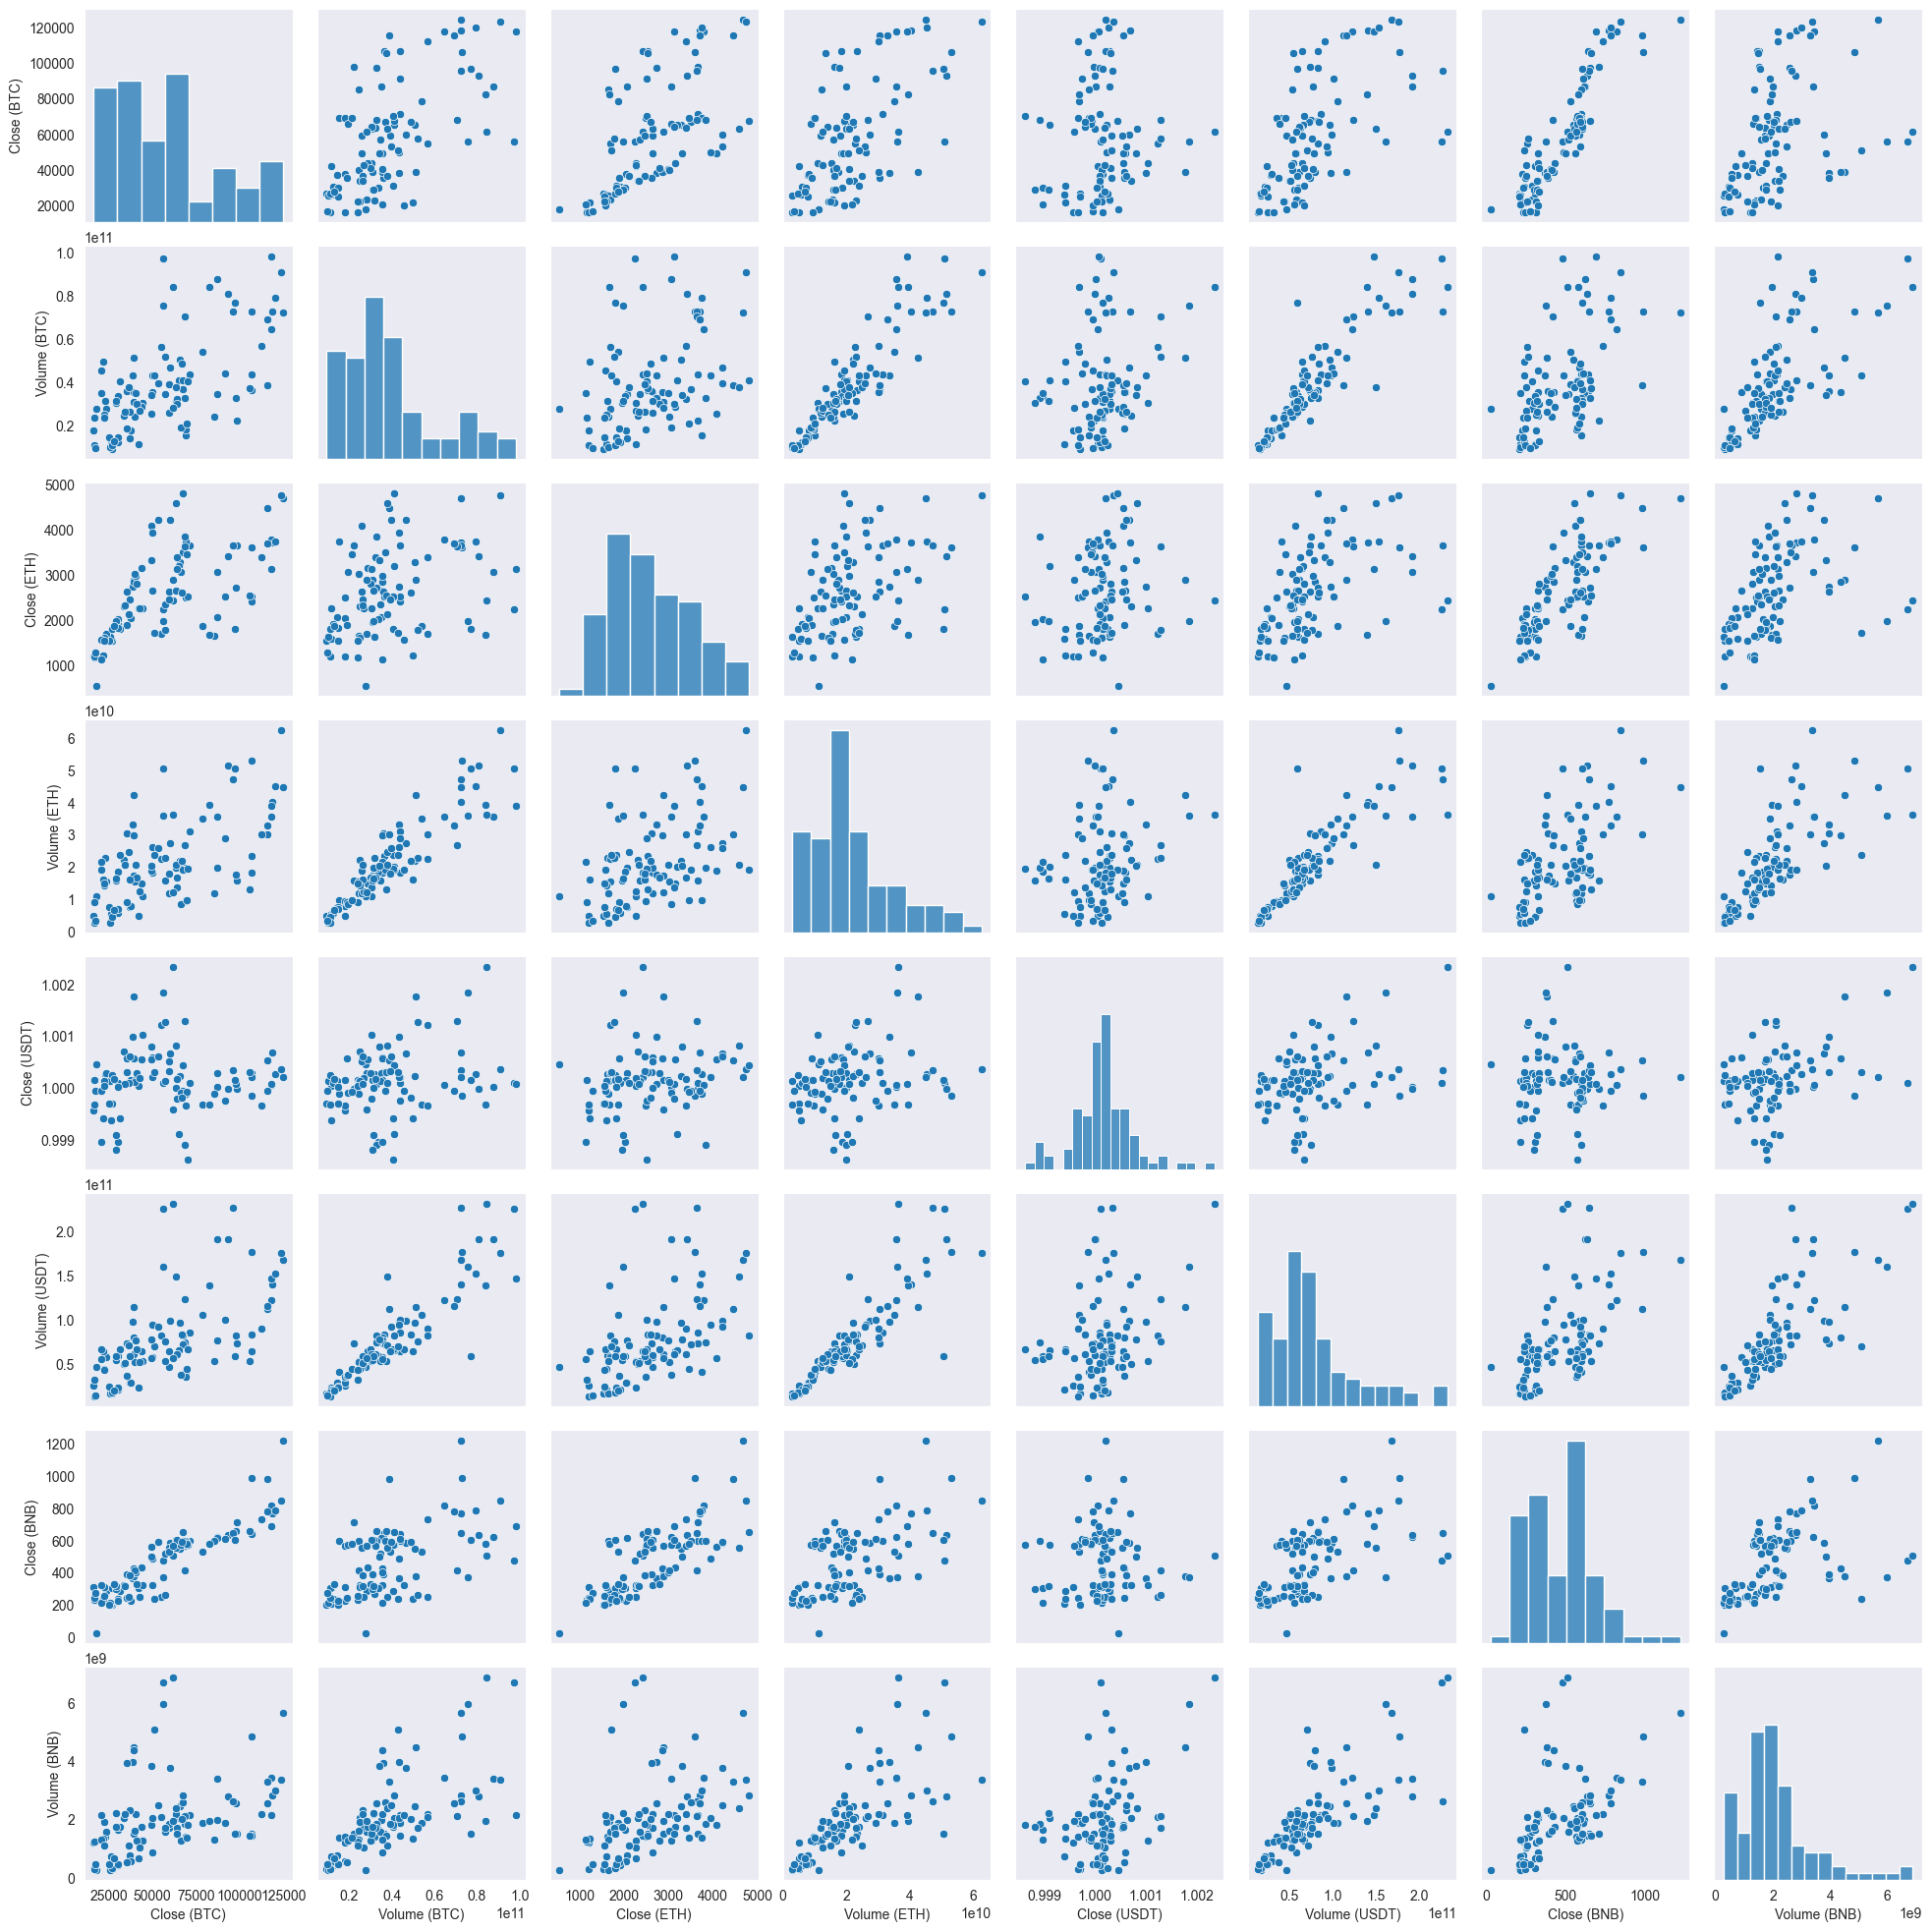

In [17]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [18]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [19]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-11-04 00:00:00+00:00,35116364962,402.141998,15126077675,1.001079,51351488942,26.931515,383972480
2020-11-05 00:00:00+00:00,40856321439,414.067352,15440711038,1.000420,50361326125,27.675859,299236756
2020-11-06 00:00:00+00:00,39837841971,454.719299,16738305610,1.000296,52898738178,29.018000,343104562
2020-11-07 00:00:00+00:00,35024953706,435.713135,18873289788,1.001576,56226369647,27.738094,362934993
2020-11-08 00:00:00+00:00,26632075029,453.554779,11292383601,1.000846,36518314883,28.305117,321186882


In [20]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-10-31 00:00:00+00:00,60090359560,3847.080322,37800100395,0.999577,135248715842,1088.955444,4399392720
2025-11-01 00:00:00+00:00,25871668762,3874.187988,17490279524,0.999664,74530426678,1094.642334,2138185589
2025-11-02 00:00:00+00:00,34284209459,3911.063232,20479611654,1.000066,87990855403,1084.359863,2049912244
2025-11-03 00:00:00+00:00,72852006359,3602.308105,53091469560,0.999853,176871325526,992.535400,4849653054
2025-11-04 00:00:00+00:00,86804201472,3557.446289,55936163840,0.999928,194737651712,961.238342,4916355584


In [21]:
Y.head()


Date
2020-11-04 00:00:00+00:00    14133.707031
2020-11-05 00:00:00+00:00    15579.848633
2020-11-06 00:00:00+00:00    15565.880859
2020-11-07 00:00:00+00:00    14833.753906
2020-11-08 00:00:00+00:00    15479.567383
Name: Close (BTC), dtype: float64

In [22]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [24]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\golla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [25]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [26]:
X_train


array([[1.00034106e+00, 5.60953702e+10, 3.33484009e+02, 1.78839076e+09],
       [1.00145102e+00, 4.83247624e+10, 3.35712830e+02, 1.14083382e+09],
       [9.99342978e-01, 4.03687915e+10, 2.20464554e+02, 1.14003369e+09],
       ...,
       [1.00006998e+00, 9.05536738e+10, 6.51264221e+02, 1.88845758e+09],
       [9.98908997e-01, 5.57459789e+10, 3.05963440e+02, 1.58449782e+09],
       [1.00010598e+00, 5.67691978e+10, 2.72069824e+02, 1.07422492e+09]],
      shape=(1461, 4))

In [27]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 168595987.59370506
R-squared: 0.8076992281352454

----- Ridge Regression -----
Mean Squared Error (MSE): 163864029.57975572
R-squared: 0.8130965047341817

----- Lasso Regression -----
Mean Squared Error (MSE): 168464409.50249207
R-squared: 0.8078493062531288

----- ElasticNet Regression -----
Mean Squared Error (MSE): 780436453.3226055
R-squared: 0.10983330915917888

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 913392545.7115647
R-squared: -0.04181655840548126

----- Decision Tree Regression -----
Mean Squared Error (MSE): 81058698.82466622
R-squared: 0.9075443575329903

----- Random Forest Regression -----
Mean Squared Error (MSE): 37815704.342017114
R-squared: 0.9568673653663466

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 48877152.298485175
R-squared: 0.944250665465417

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 45798069.899939425
R-squared: 0.94776267029

c:\Users\golla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 557140988.6293811
R-squared: 0.36452436573334723

                             Model           MSE  R-squared
0                Linear Regression  1.685960e+08   0.807699
1                 Ridge Regression  1.638640e+08   0.813097
2                 Lasso Regression  1.684644e+08   0.807849
3            ElasticNet Regression  7.804365e+08   0.109833
4  Support Vector Regression (SVR)  9.133925e+08  -0.041817
5         Decision Tree Regression  8.105870e+07   0.907544
6         Random Forest Regression  3.781570e+07   0.956867
7     Gradient Boosting Regression  4.887715e+07   0.944251
8   K-Nearest Neighbors Regression  4.579807e+07   0.947763
9  Neural Network Regression (MLP)  5.571410e+08   0.364524


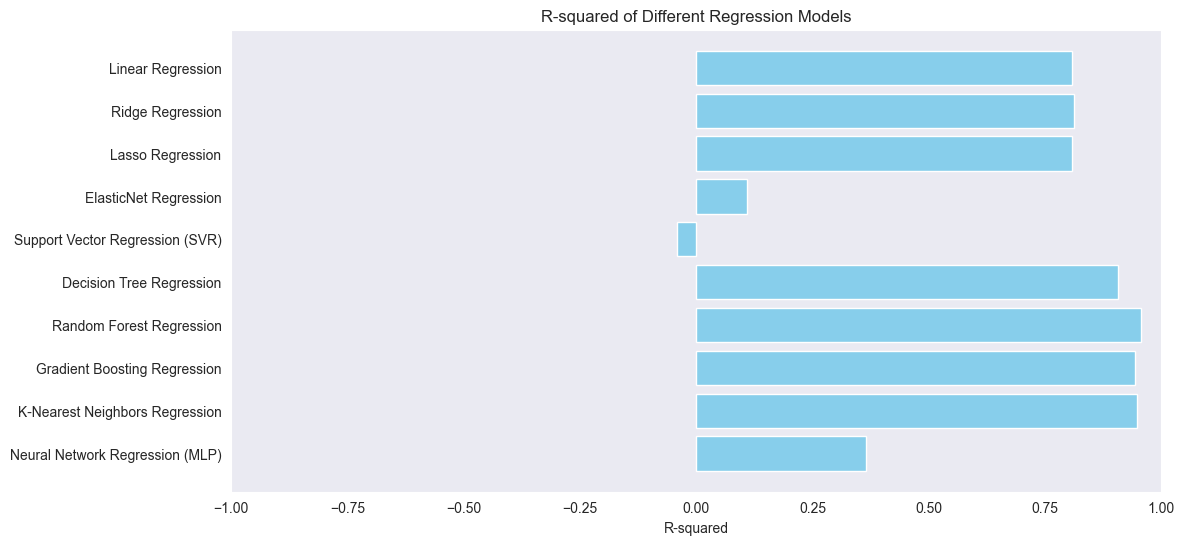

In [29]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [30]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 38099343.570180796
Loaded Random Forest Regression - R-squared: 0.9565438461457205
